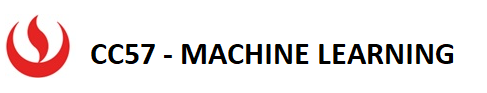

## **ACTIVIDAD #2:** E-COMMERCE AMAZON LIBROS - ANALISIS ESTADISTICO

###**1. DESCRIPCION**

**Amazon.com Inc.** es una tienda de comercio electrónico estadounidense que ofrece una amplia gama de productos, incluyendo libros, música, películas, y computadoras. También ofrece servicios basados en la web, fabrica dispositivos electrónicos tales como Kindle y tabletas, y ofrece servicios de auto-publicación. (Fuente: https://www.bnamericas.com/es/perfil-empresa/amazoncom-inc#:~:text=Amazon.com%20Inc.,ofrece%20servicios%20de%20auto%2Dpublicaci%C3%B3n)

### **2. OBJETIVO**

Realizar un análisis EDA a partir de los datos proporcionados y calcular/visualizar sus principales estadísticas.

####**3. ANALISIS EXPLORATORIO DE LOS DATOS**

El dataset a analizar contiene datos de libros vendidos en Amazon, tanto en formato digital (plaforma Kindle) y fisica.  Cuenta con 133102 observaciones en 16 variables.



####**3.1. Librerias**

In [2]:
#Incluya las principales librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####**3.2. Carga de datos**

In [3]:
# Cargar datos de libros_amazon.csv
df = pd.read_csv("libros_amazon.csv")

####**3.3. Resumen de los datos**


In [4]:
#Info, head y shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [5]:
df.head(5)

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [6]:
df.shape

(133102, 16)

In [7]:
# Mostrar detalles estadísticos básicos (solo los calcula a las variables numericas)
df[['stars', 'reviews', 'price', 'category_id']].describe()

,stars,reviews,price,category_id
count,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111
std,0.745646,5104.878777,22.254986,8.416924
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


In [8]:
# Verificar data faltante en cada columna y duplicados
# 1. Verificar valores faltantes por columna
df.isnull().sum()

asin                     0
title                    0
author                 425
soldBy                9233
imgUrl                   0
productURL               0
stars                    0
reviews                  0
price                    0
isKindleUnlimited        0
category_id              0
isBestSeller             0
isEditorsPick            0
isGoodReadsChoice        0
publishedDate        49016
category_name            0
dtype: int64

In [9]:
# 2. Verificar duplicados en todo el DataFrame
df.duplicated().sum()

0

In [10]:
#Verificar proporciones de valores nulos
# Número y proporción de nulos por columna
nulls = df.isnull().sum()
proportion = (df.isnull().mean() * 100).round(2)

missing_report = pd.DataFrame({
    "Nulos": nulls,
    "Proporción (%)": proportion
})

print(missing_report)

                   Nulos  Proporción (%)
asin                   0            0.00
title                  0            0.00
author               425            0.32
soldBy              9233            6.94
imgUrl                 0            0.00
productURL             0            0.00
stars                  0            0.00
reviews                0            0.00
price                  0            0.00
isKindleUnlimited      0            0.00
category_id            0            0.00
isBestSeller           0            0.00
isEditorsPick          0            0.00
isGoodReadsChoice      0            0.00
publishedDate      49016           36.83
category_name          0            0.00


In [ ]:
#Verificar duplicación de registros u observaciones



###**3.4. Preprocesamiento de los datos**

In [11]:
#Verificamos que no existan datos faltantes
#Como solucionamos los datos faltantes? Eliminamos todos los datos faltantes?
#Utilice una tecnica para reemplazar los datos faltantes (una para valores numericos y otra para categoricos)

from sklearn.impute import SimpleImputer

# Realizamos una copia del dataframe original
df_clean = df.copy()

# 1. Eliminar NA en author
df_clean = df_clean.dropna(subset=['author'])

# 2. Eliminar NA en soldBy (si decides imputar, cambia esto)
df_clean = df_clean.dropna(subset=['soldBy'])

# 3. Convertir publishedDate a año numérico
df_clean['publishedDate'] = pd.to_datetime(df_clean['publishedDate'], errors='coerce').dt.year

# 4. Imputar medianas en publishedDate
imputer_year = SimpleImputer(strategy='median')
df_clean[['publishedDate']] = imputer_year.fit_transform(df_clean[['publishedDate']])

#Verificar proporciones de valores nulos
# Número y proporción de nulos por columna
nulls = df_clean.isnull().sum()
proportion = (df_clean.isnull().mean() * 100).round(2)

missing_report = pd.DataFrame({
    "Nulos": nulls,
    "Proporción (%)": proportion
})

print(missing_report)
print(df_clean.shape)

                   Nulos  Proporción (%)
asin                   0             0.0
title                  0             0.0
author                 0             0.0
soldBy                 0             0.0
imgUrl                 0             0.0
productURL             0             0.0
stars                  0             0.0
reviews                0             0.0
price                  0             0.0
isKindleUnlimited      0             0.0
category_id            0             0.0
isBestSeller           0             0.0
isEditorsPick          0             0.0
isGoodReadsChoice      0             0.0
publishedDate          0             0.0
category_name          0             0.0
(123564, 16)


In [ ]:
#Solucionar duplicidad en los datos (si existen)

In [12]:
#Identificar variables con valores atipicos
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Revisar en variables numéricas
for col in ['stars', 'reviews', 'price']:
    outliers, li, ls = detectar_outliers(df_clean, col)
    print(f"📌 {col}: {len(outliers)} outliers (fuera de [{li:.2f}, {ls:.2f}])")

📌 stars: 6979 outliers (fuera de [3.95, 5.15])
📌 reviews: 19018 outliers (fuera de [-570.38, 950.62])
📌 price: 14432 outliers (fuera de [-7.61, 28.55])


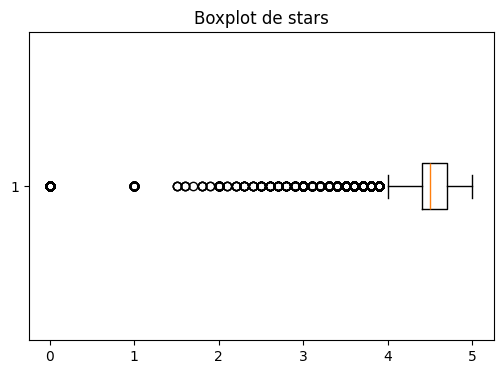

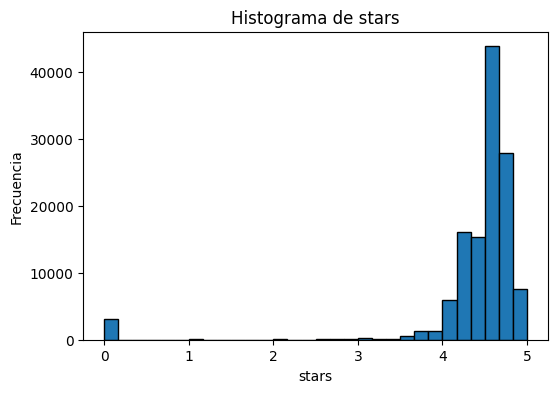

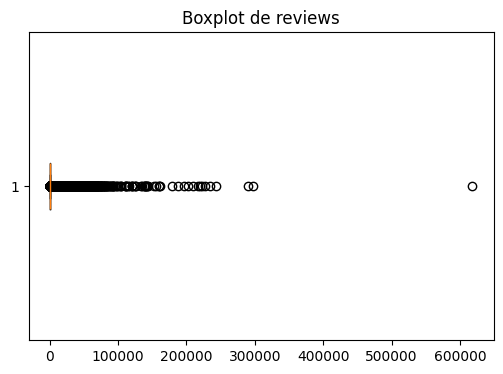

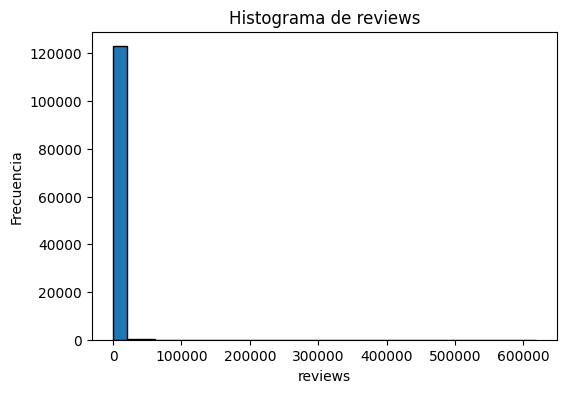

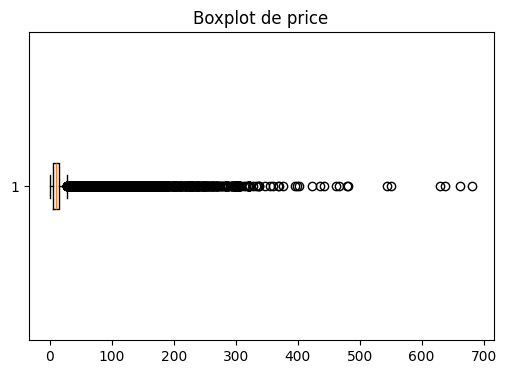

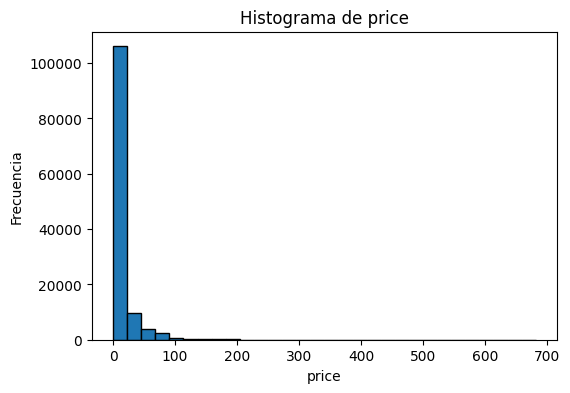

In [13]:
# Función para graficar boxplot e histograma
def graficar_outliers(df, col):
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Graficar las 3 variables principales
for col in ["stars", "reviews", "price"]:
    graficar_outliers(df_clean, col)

In [ ]:
# Definimos las columnas a winsorizar
columns_to_winsorize = ['stars', 'reviews', 'price']

# Función para winsorizar una columna entre percentiles 5% y 95%
def filtrar_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR
    return df[(df[col] >= li) & (df[col] <= ls)]

# Aplicamos winsorización a cada columna
for col in columns_to_winsorize:
    # Winsorizamos
    df_clean = filtrar_iqr(df_clean, col)


Estadísticas de stars antes de winsorizar:
count    123564.000000
mean          4.394954
std           0.756113
min           0.000000
25%           4.400000
50%           4.500000
75%           4.700000
max           5.000000
Name: stars, dtype: float64

Estadísticas de stars después de winsorizar:
count    123564.000000
mean          4.497783
std           0.251532
min           3.900000
25%           4.400000
50%           4.500000
75%           4.700000
max           4.900000
Name: stars, dtype: float64

Estadísticas de reviews antes de winsorizar:
count    123564.000000
mean        867.653580
std        4956.139047
min           0.000000
25%           0.000000
50%          10.000000
75%         380.250000
max      618227.000000
Name: reviews, dtype: float64

Estadísticas de reviews después de winsorizar:
count    123564.000000
mean        457.012520
std         916.870554
min           0.000000
25%           0.000000
50%          10.000000
75%         380.250000
max        3493.0

In [25]:
#Identificar variables con valores atipicos
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Revisar en variables numéricas
for col in ['stars', 'reviews', 'price']:
    outliers, li, ls = detectar_outliers(df_clean, col)
    print(f"📌 {col}: {len(outliers)} outliers (fuera de [{li:.2f}, {ls:.2f}])")

📌 stars: 6979 outliers (fuera de [3.95, 5.15])
📌 reviews: 19018 outliers (fuera de [-570.38, 950.62])
📌 price: 14432 outliers (fuera de [-7.61, 28.55])


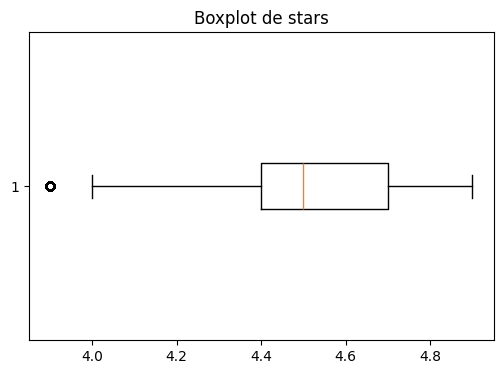

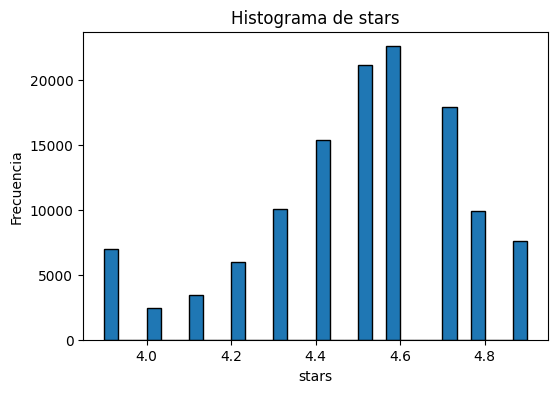

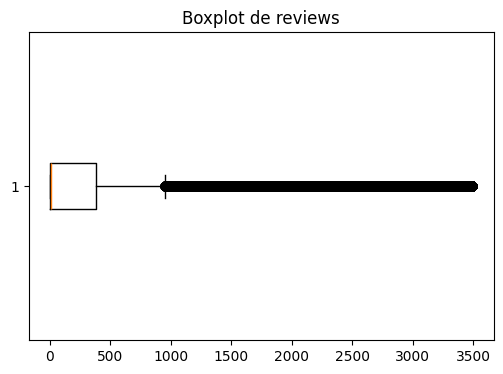

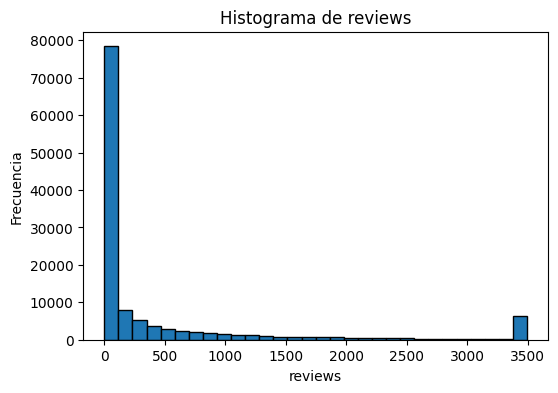

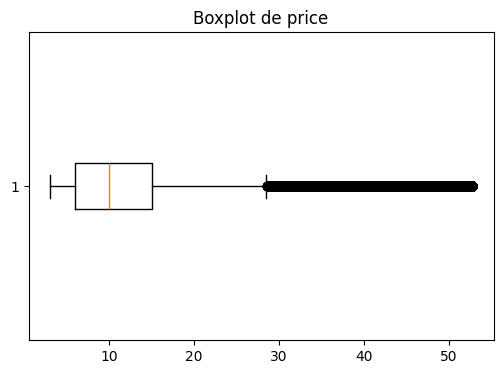

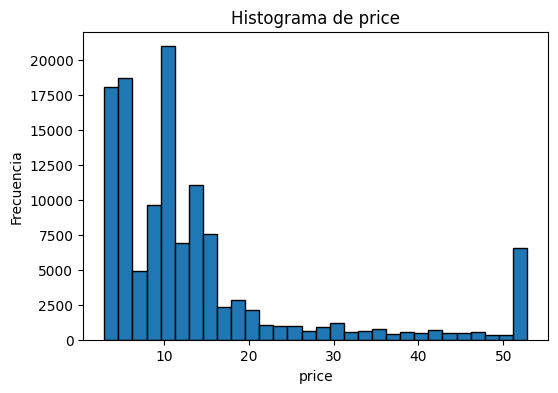

In [26]:
# Función para graficar boxplot e histograma
def graficar_outliers(df, col):
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.title(f'Boxplot de {col}')
    plt.show()

    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Graficar las 3 variables principales
for col in ["stars", "reviews", "price"]:
    graficar_outliers(df_clean, col)

In [20]:
# De existir, eliminar Outliers describiendo que tecnica(s) ha utilizado en cada caso

# --- Eliminación de outliers con IQR en stars y price ---
def filtrar_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR
    return df[(df[col] >= li) & (df[col] <= ls)]

# Stars y Price → eliminar fuera de IQR
df_clean = filtrar_iqr(df_clean, 'stars')
df_clean = filtrar_iqr(df_clean, 'price')

# Reviews → eliminar negativos y winsorización en el percentil 99
df_clean = df_clean[df_clean['reviews'] >= 0]
p99 = df_clean['reviews'].quantile(0.99)
df_clean['reviews'] = df_clean['reviews'].clip(upper=p99)


In [21]:
#Identificar variables con valores atipicos
def detectar_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Revisar en variables numéricas
for col in ['stars', 'reviews', 'price']:
    outliers, li, ls = detectar_outliers(df_clean, col)
    print(f"📌 {col}: {len(outliers)} outliers (fuera de [{li:.2f}, {ls:.2f}])")

📌 stars: 0 outliers (fuera de [3.95, 5.15])
📌 reviews: 14660 outliers (fuera de [-801.00, 1335.00])
📌 price: 1427 outliers (fuera de [-7.01, 24.99])


In [22]:
df_clean.shape

(103980, 16)

In [ ]:
# Genere un dataset con los datos preparados

A partir de los datos preparados, trabaje las siguientes secciones.

####**4. ESTADISTICA DESCRIPTIVA**

In [ ]:
# A partir del dataset preparado, mostrar detalles estadísticos básicos

In [ ]:
#Identificar y separar variables numéricas y categóricas


####**4.1 Análisis Univariado de los Datos**

#### **Diagramas de pares y diagramas de distribución**

In [ ]:
# Generar estadísticas descriptivas para columnas numéricas


In [ ]:
# Generar estadísticas descriptivas para columnas categóricas
# Si No hay variables categoricas, considere crear algunas


In [ ]:
# Utilice algunas de las medidas de dispersion y representelas a traves de diagramas
# Creando un diagrama de pares y de distribucion para variables numéricas


####**4.2 Análisis Bivariado de los Datos**

#### **- Correlacion de variables**

In [ ]:
# Calcular e imprimir la matriz de correlación para variables numéricas.


In [ ]:
# Visualizar la matriz de correlacion en un mapa de calor


In [ ]:
# Calculo del coeficiente de asimetria y de curtosis. Como los interpreta?

¿Qué variables son las tienen mayor correlación?

**Respuesta:**

### **4. Visualización de los datos**

In [ ]:
#Grafica de barras de la distribucion de los libros por categoria en orden descendente, distinga los que son betsellers de los que nolo son


In [ ]:
# Cantidad de libros por cada categoria


In [ ]:
#Top Autores de Best Sellers


In [ ]:
#Ratings for Best Sellers


### **5. Observaciones**

**Respuesta:** (liste las principales observaciones o conclusiones observadas luego del análisis)